In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, glob

In [5]:
def plot_corr(data, figsize=(15,15)):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, square=True, cmap='RdBu_r', center=0, annot=True,
                        annot_kws={'fontsize':8})

In [12]:
merged = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/MERGE_FT_TEP_UT_on_ID.csv'),
                    index_col=0)

In [13]:
merged

,KJIC,MS_Avg,MS_neg_error,MS_pos_error,TEP_average,TEP_error,Beta_avg,PC_IF_2.25MHz,SE_IF_2.25MHz,SE_%_IF_2.25MHz,IF_2.25MHz,PC_IF_3.5MHz,SE_IF_3.5MHz,SE_%_IF_3.5MHz,IF_3.5MHz,PC_BS
ID,,,,,,,,,,,,,,,,
304-0-1,147.2,NaN,NaN,NaN,NaN,NaN,0.002743,0.0,0.013,2.9,0.448276,0.0,0.005,1.3,0.384615,0.0
304-0-2,153.6,0.12,0.035,0.086,-1.547,0.049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304-0-3,148.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304-0-4,181.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304-0-5,179.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A286-80-1,51.0,NaN,NaN,NaN,NaN,NaN,0.002187,501.0,0.025,2.0,1.250000,759.0,0.022,1.5,1.466667,-64.0
A286-80-2,50.5,0.01,0.002,0.002,-1.466,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A286-80-3,53.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plotting

group data by type of sample and cold work

In [14]:
merged.index = merged.index.str.rstrip('-12345')

In [15]:
mean_df = merged.groupby('ID').mean()

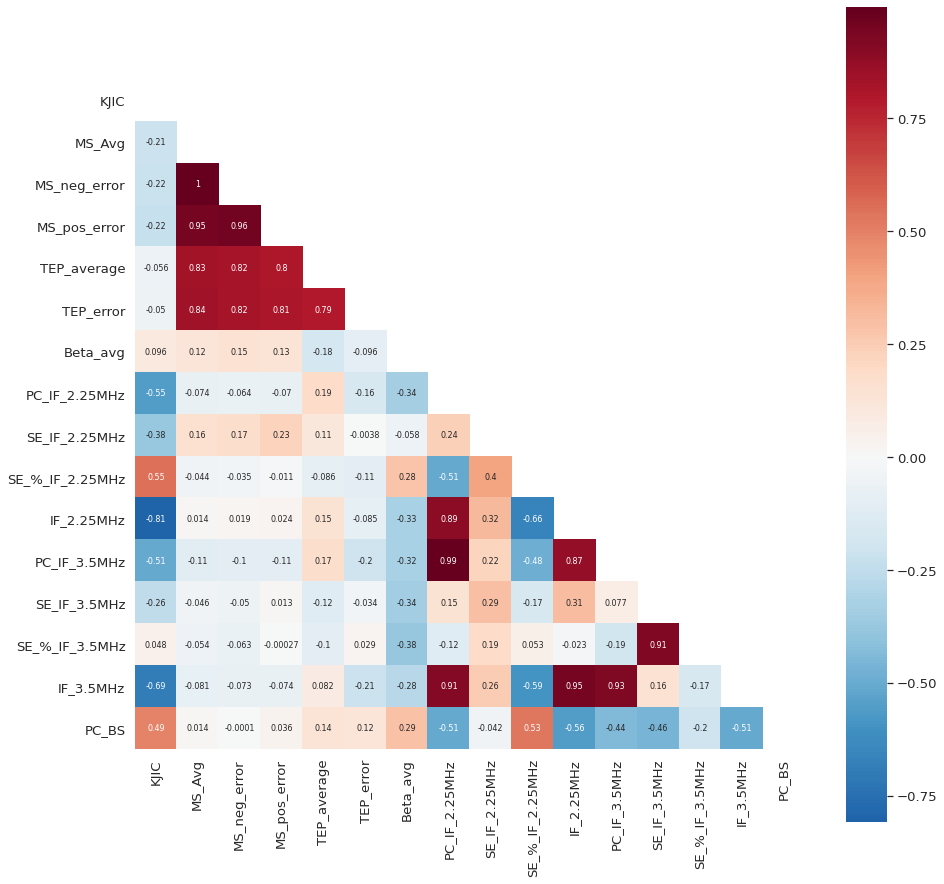

In [16]:
plot_corr(mean_df)

### Use only mean

In [17]:
short_mean = mean_df.loc[:, ['KJIC', 'MS_Avg', 'TEP_average',
        'Beta_avg', 'IF_2.25MHz', 'IF_3.5MHz',
       'PC_BS']]
short_mean['Type'] = short_mean.index.str.split('-').str[0]
short_mean

,KJIC,MS_Avg,TEP_average,Beta_avg,IF_2.25MHz,IF_3.5MHz,PC_BS,Type
ID,,,,,,,,
304-0,162.000000,0.12000,-1.54700,0.002743,0.448276,0.384615,0.0,304
304-20,105.780000,0.49600,-1.32200,0.002093,0.700000,0.545455,-12.0,304
304-40,100.700000,1.35000,-1.21600,0.001941,0.733333,0.631579,-20.0,304
304-60,91.320000,1.37100,-1.24900,0.002567,0.909091,0.882353,3.0,304
304-80,73.775000,3.96600,-0.97600,0.002420,0.888889,0.875000,10.0,304
316-0,111.240000,0.03900,-1.50600,0.002433,0.456522,0.416667,0.0,316
316-20,69.960000,0.03600,-1.57300,0.002785,0.640000,0.571429,30.0,316
316-40,68.220000,0.04400,-1.64000,0.002494,0.700000,0.625000,-34.0,316
316-60,69.000000,0.04925,-1.67375,0.002292,0.944444,1.300000,-57.0,316


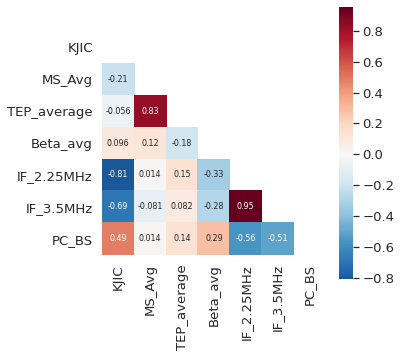

In [18]:
plot_corr(short_mean, figsize=(5,5))

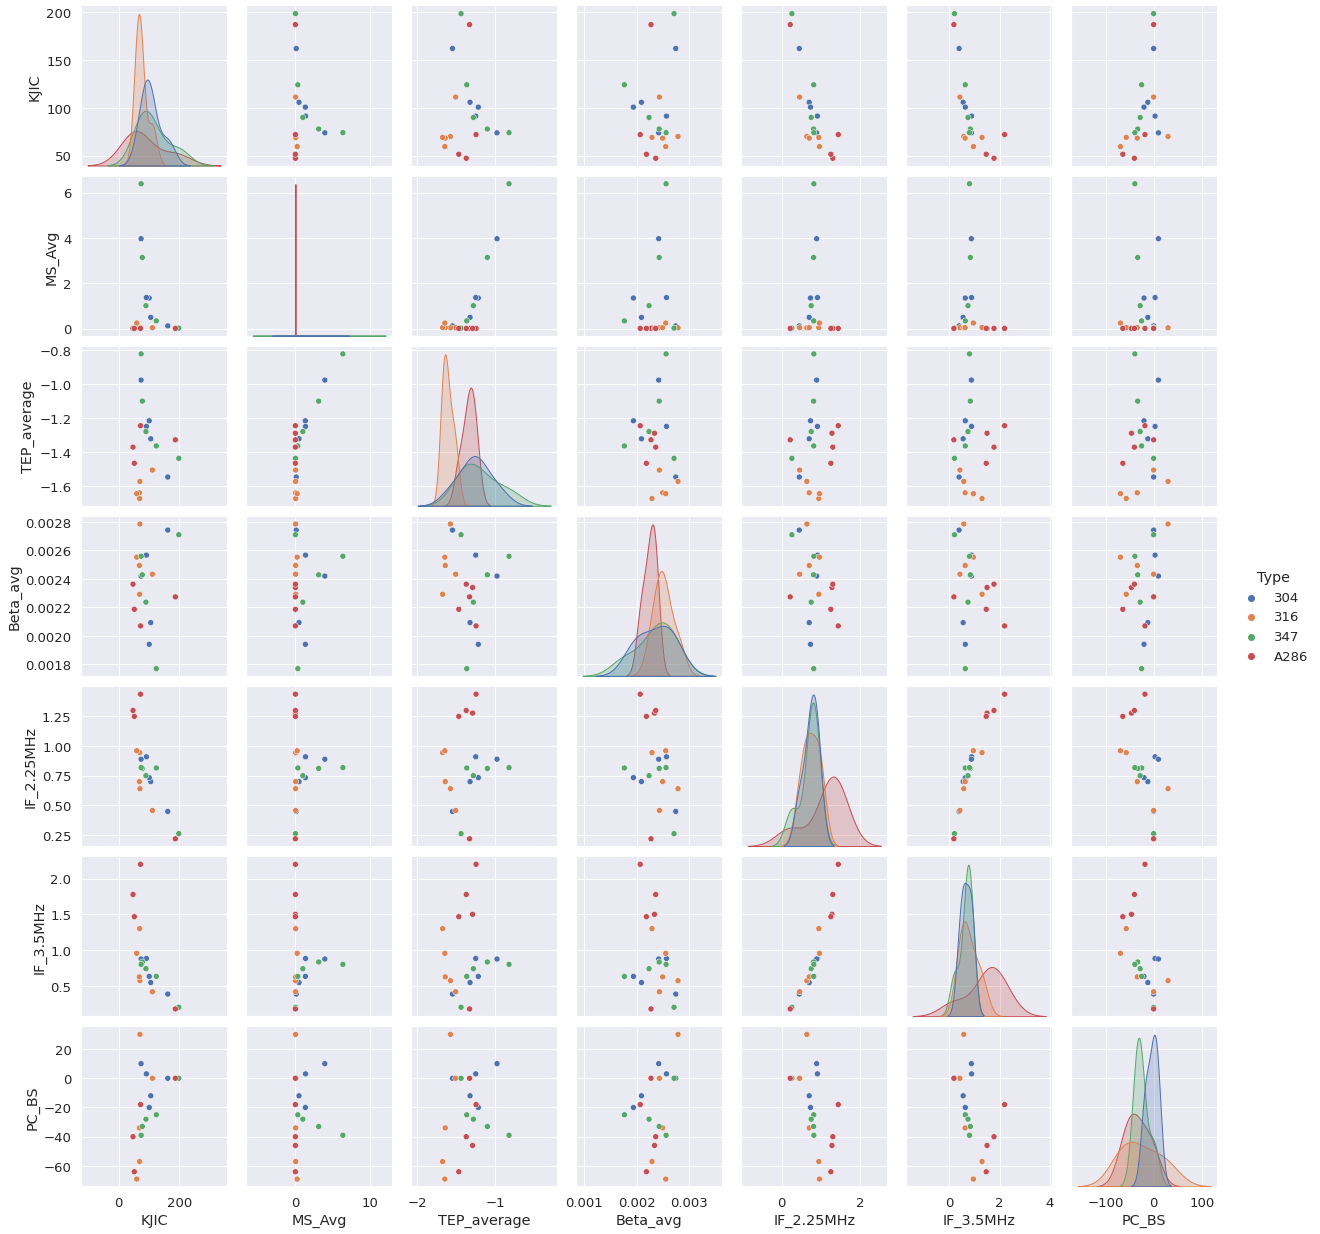

In [19]:
sns.pairplot(short_mean, hue='Type')

In [20]:
short_mean.head()

,KJIC,MS_Avg,TEP_average,Beta_avg,IF_2.25MHz,IF_3.5MHz,PC_BS,Type
ID,,,,,,,,
304-0,162.000,0.120,-1.547,0.002743,0.448276,0.384615,0.0,304
304-20,105.780,0.496,-1.322,0.002093,0.700000,0.545455,-12.0,304
304-40,100.700,1.350,-1.216,0.001941,0.733333,0.631579,-20.0,304
304-60,91.320,1.371,-1.249,0.002567,0.909091,0.882353,3.0,304
304-80,73.775,3.966,-0.976,0.002420,0.888889,0.875000,10.0,304


In [21]:
test = pd.melt(short_mean, id_vars=['KJIC', 'Type'], value_vars=['MS_Avg', 'TEP_average', 'Beta_avg', 'IF_2.25MHz', 'IF_3.5MHz', 'PC_BS'] )

In [22]:
test

,KJIC,Type,variable,value
0,162.000000,304,MS_Avg,0.120
1,105.780000,304,MS_Avg,0.496
2,100.700000,304,MS_Avg,1.350
3,91.320000,304,MS_Avg,1.371
4,73.775000,304,MS_Avg,3.966
...,...,...,...,...
115,187.025000,A286,PC_BS,0.000
116,71.950000,A286,PC_BS,-18.000
117,NaN,A286,PC_BS,-46.000
118,47.166667,A286,PC_BS,-40.000


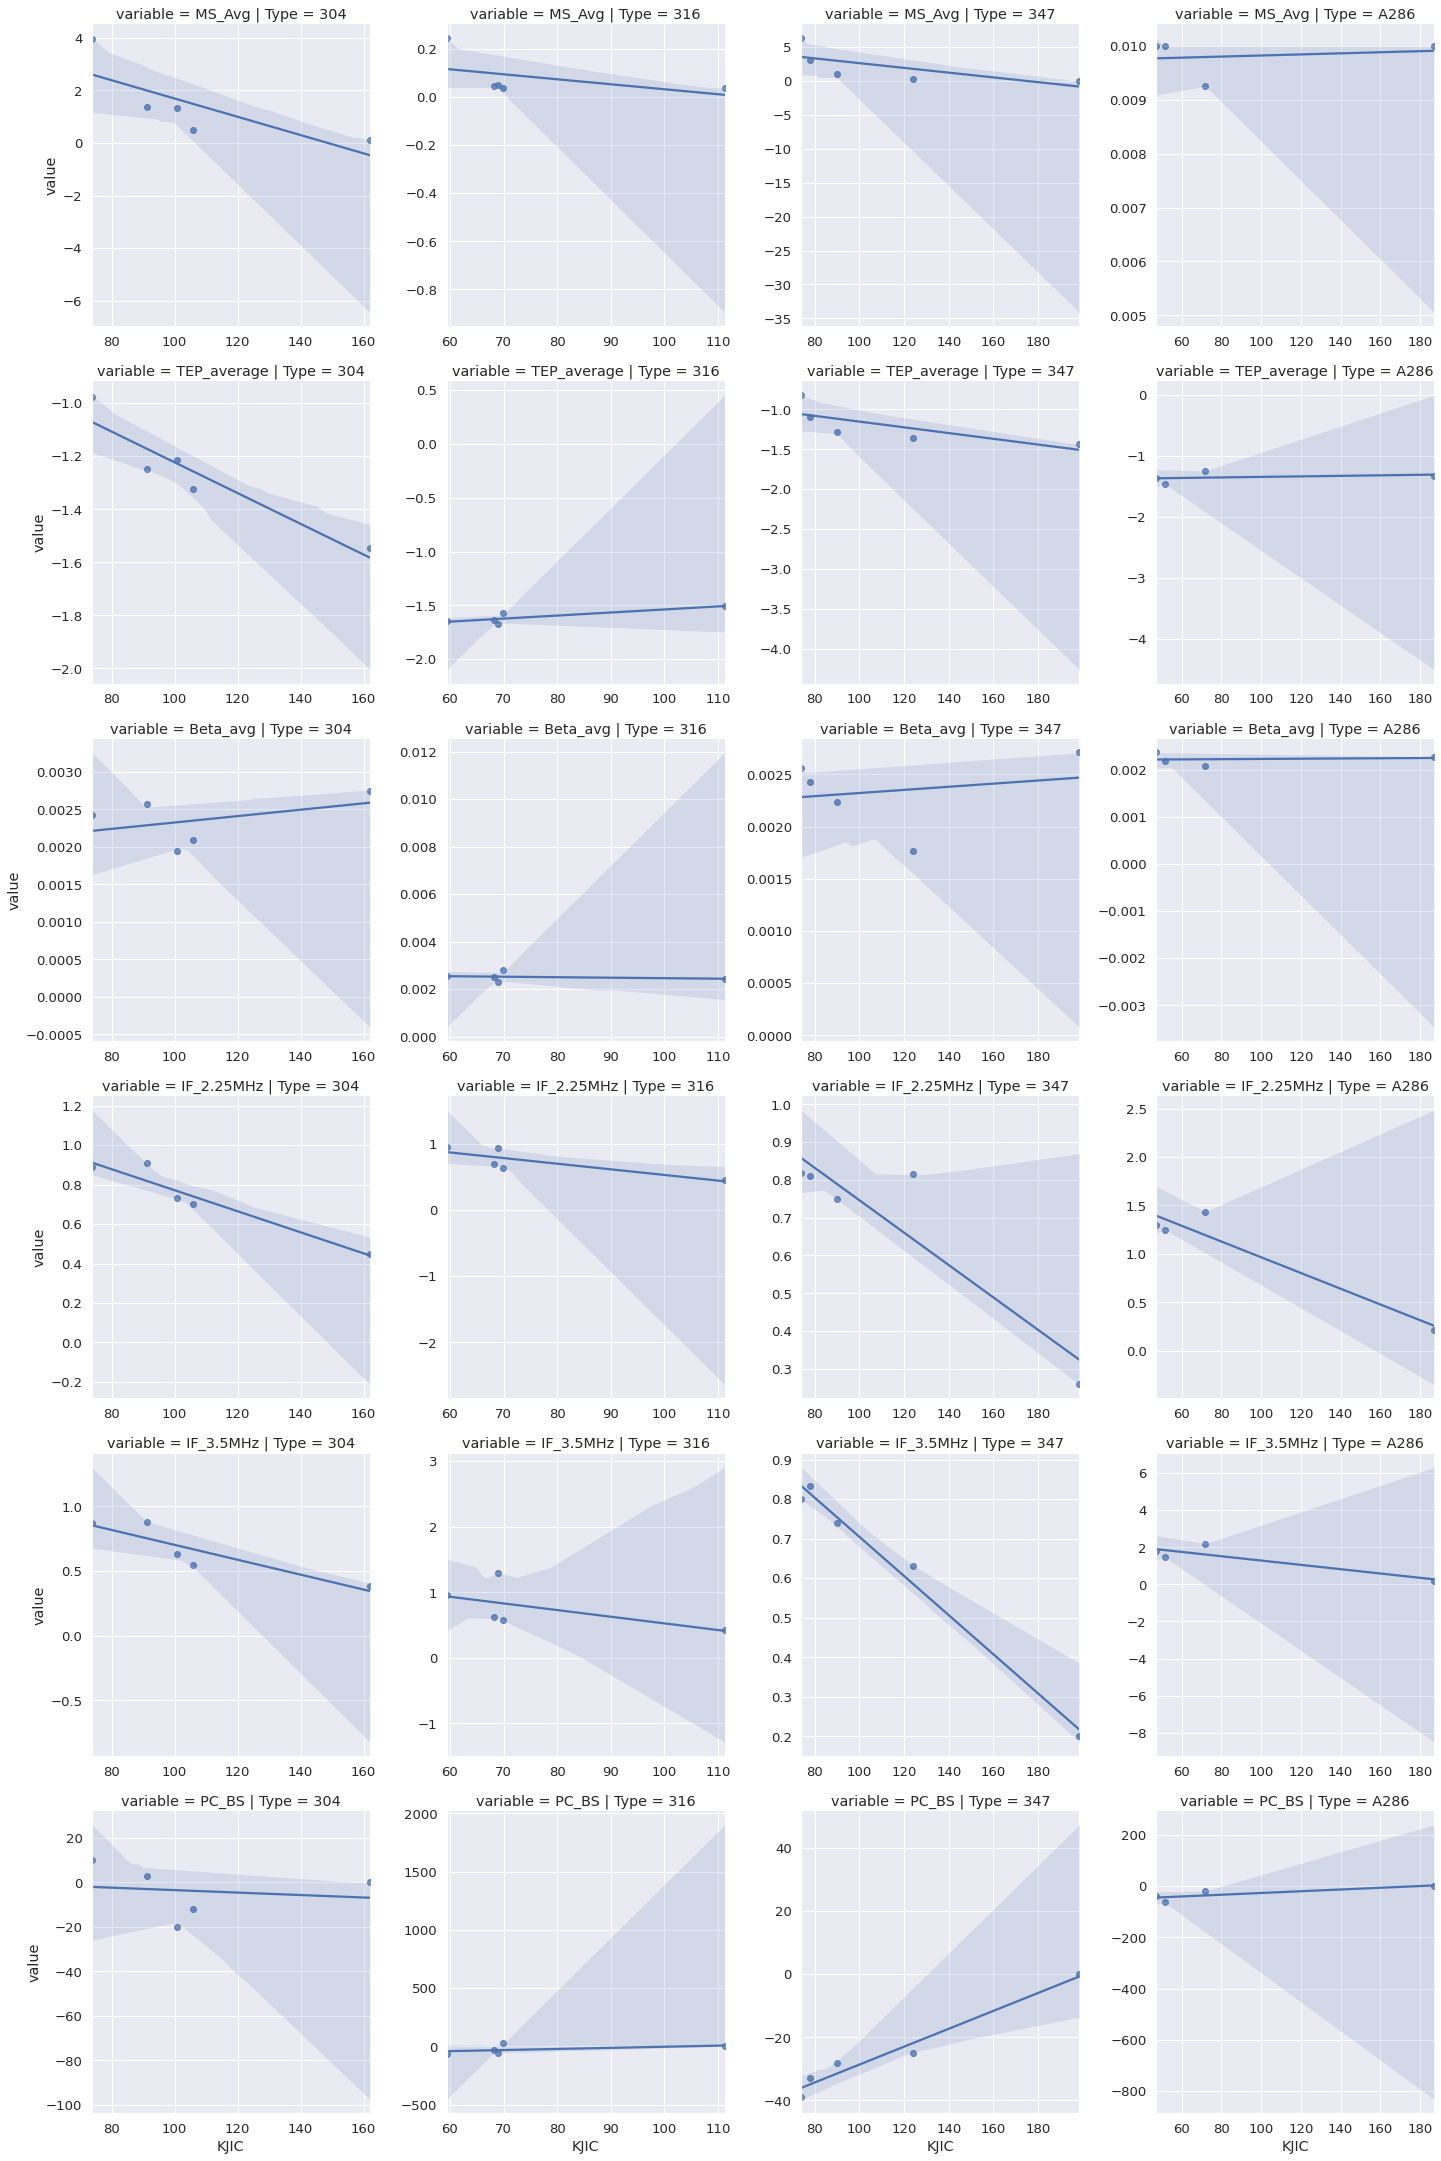

In [23]:
sns.lmplot(x='KJIC', y='value', data=test, col='Type', row='variable', sharey=False, sharex=False)